In [5]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
from matplotlib import animation
import sys 
import math
%matplotlib inline

In [9]:
#Libreria para programar en parallelo
from pyspark import SparkContext
import multiprocessing as mp
from joblib import Parallel, delayed

In [294]:
def dis_XXX(p,bn,point_max):
    
    #Inicializamos los arreglos de los histogramas
    NDDD = np.zeros((bn,bn,bn))
    
    # =========================================================================================== 
    
    n = 0
    for (ii) in zip(p):
        n = n+1
        
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        
        m = 0
        for (kk) in zip(p[n:]):
            
            #DDD ===============================================================================
            r12 = np.ones_like(r[m+1:])*r[m]
            r13 = r[m+1:]
        
            ss = kk-p[n:][m+1:] # Diferencia entre el punto pivote y los demas puntos siguientes 
            r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
        
            # Histogramas para DDD
            dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
            NDDD = NDDD + dis
            
            m = m+1
    
    DDD = NDDD 
    #Hacemos la simetrización del histograma 
    """
    for i in range(bn - 2):
        for j in range(i+1, bn-1):
            for k in range(j+1, bn):
                s = NDDD[i][j][k] + NDDD[i][k][j] + NDDD[j][i][k] + NDDD[j][k][i] + NDDD[k][i][j] + NDDD[k][j][i]
                DDD[i][j][k] = s
                DDD[i][k][j] = s
                DDD[j][i][k] = s
                DDD[j][k][i] = s
                DDD[k][i][j] = s
                DDD[k][j][i] = s
    """            
    return DDD

In [295]:
def dis_XXY(p,p_r,bn,point_max):
    
    NDDR = np.zeros((bn,bn,bn))
    NDRR = np.zeros((bn,bn,bn))
    
    # =========================================================================================== 
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        
        s_ran = jj-p_r[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r_ran = np.sqrt(s_ran[:,0]**2+s_ran[:,1]**2+s_ran[:,2]**2)
        
        m = 0
        for (kk, ll) in zip(p[n:], p_r[n:]):
            
            #DDR ===============================================================================
            r12 = np.ones_like(p_r.T[0])*r[m]
            
            ss = ii-p_r # Diferencia entre el punto pivote y el punto en la muestra random 
            r13 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            ss = kk-p_r # Diferencia entre el punto 2 de los datos y el punto en la muestra random 
            r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            # Histogramas para DDR
            dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
            NDDR = NDDR + dis
            
            #DRR ===============================================================================
            r12 = np.ones_like(p.T[0])*r_ran[m]
            
            ss = jj-p # Diferencia entre el punto pivote random y el punto en los datos 
            r13 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            ss = ll-p # Diferencia entre el punto 2 de la muestra random y el punto en los datos 
            r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            # Histogramas para DRR
            dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
            NDRR = NDRR + dis
            
            m = m+1
    
    DDR = NDDR
    DRR = NDRR 
    """
    for i in range(bn - 2):
        for j in range(i+1, bn-1):
            for k in range(j+1,bn):
                s = NDDR[i][j][k] + NDDR[j][i][k]+ NDDR[i][k][j]+ NDDR[j][k][i]+ NDDR[k][i][j]++ NDDR[k][j][i]
                DDR[i][j][k] = s
                DDR[i][k][j] = s
                DDR[j][i][k] = s
                DDR[j][k][i] = s
                DDR[k][i][j] = s
                DDR[k][j][i] = s
        
                s = NDRR[i][j][k] + NDRR[j][i][k]+ NDRR[i][k][j]+ NDRR[j][k][i]+ NDRR[k][i][j]++ NDRR[k][j][i]
                DRR[i][j][k] = s
                DRR[i][k][j] = s
                DRR[j][i][k] = s
                DRR[j][k][i] = s
                DRR[k][i][j] = s
                DRR[k][j][i] = s
    """
    return DDR+DRR

In [296]:
data = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/data_500.dat')[:,:3]
rand = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/rand0_500.dat')[:,:3]

In [297]:
Parallel(n_jobs=2)(delayed(math.sqrt)(i ** 2) for i in range(10))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [298]:
#FUNCIÓN DE PARA HACER HISTOGRAMAS 
def Histos(data,bn,point_max,nuc):

    XXX =  np.zeros((bn,bn,bn))
    tam = len(data)
    
    #Hacemos una subdivición de los samples en el número de núcleos
    p = sc.parallelize(np.split(data,[x for x in range(math.ceil(tam/nuc),tam,math.ceil(tam/nuc))])) 
    
    #Sacamos los histogramas de los triangulos de casa subconjunto 
    XXX_1 = p.map(lambda x: dis_XXX(x,bn,point_max)).collect()
    
    for ii in XXX_1:
        XXX = XXX+ii
        
    #Sacamos los histogramas de los triangulos entre los subconjuntos
    
    n = 0
    for ii in p.collect()[:nuc-1]:
        n = n+1
        
        #pool = mp.Pool(processes=len(p.collect()[n:]))      
        #results = [pool.apply_async(dis_XY, args=(ii,jj,bn,point_max)) for jj in p.collect()[n:]]   
        #output = [b.get() for b in results]
        
        results = Parallel(n_jobs=nuc)(delayed(dis_XXY)(ii,jj,bn,point_max) for jj in p.collect()[n:])
        
        print('---',len(results))
        
        for i in range(len(results)):
            print(len(results)-i)
            XXX = XXX + results[i]
        print('===================================')                           
    
    return XXX

In [299]:
sc.stop()

In [300]:
#Paralelizado
nuc = 2

sc = SparkContext(master='local[{0}]'.format(int(nuc)))
print(sc.master)

start = time.perf_counter()

DDD = Histos(data,30,180,nuc)
finish = time.perf_counter()

sc.stop()
print(f'Finializó en {round(finish-start,2)} segundos\n')

local[2]
--- 1
1
Finializó en 28.39 segundos



In [292]:
DDD_no = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/mis_datos/FB/all/DDD_iso_500_osc.dat').reshape(30,30,30)

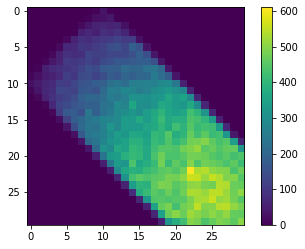

In [301]:
plt.imshow(DDD[10])
cax=plt.colorbar()

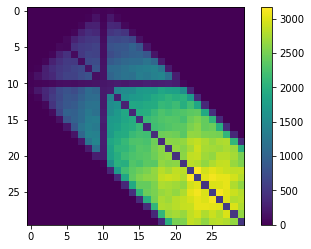

In [281]:
plt.imshow(DDD_no[10])
cax=plt.colorbar()

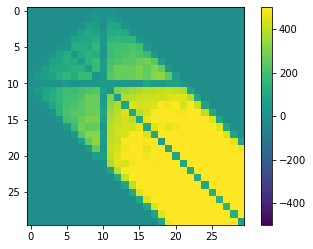

In [283]:
plt.imshow(DDD_no[10]-DDD[10],vmin=-500, vmax=500)
cax=plt.colorbar()

In [245]:
DDD_no-DDD

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   3.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,  -1.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,  18.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,  -1.,   3., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  17.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,  22.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,  14.]],

       [[  0.,   0.,  -2., ...,   0.,   0.,   0.],
        [  0.,   1.,  -1., ...,   0.,   0.,   0.],
        [  2.,  -2.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  22.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   2.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,  17.]],

       ...,

       [[  0.,   0.,   0